# Predicting Diabetes
**From "Machine Learning With Python 3" by Jerry Kurata**
November 2023

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [5]:
df = pd.read_csv("./pima-data.csv") #load Pima data.

In [6]:
df.shape  #(rows, columns)

(768, 10)

In [7]:
df.head(5) #return 5 lines

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [8]:
df.isnull().values.any() #check for null values


False

**Correlated columns** are columns that are essentially showing the same data, but may not appear that way. For example, a dataset of real estate might include a column for house size in sq ft and a column for house size in sq meters. If we build a model off of this data set using both these columns, house size would become twice as important as it should be, because we'd have two columns with essentially the same data.

In [9]:
def plot_corr(df, size=11):
    corr = df.corr()  #data frame correlation function
    fig, ax = plt.subplots(figsize=(size,size))
    ax.matshow(corr) #color code the rectangels by correlation value
    plt.xticks(range(len(corr.columns)), corr.columns) #draw x tick marks
    plt.yticks(range(len(corr.columns)), corr.columns) #draw y tick marks

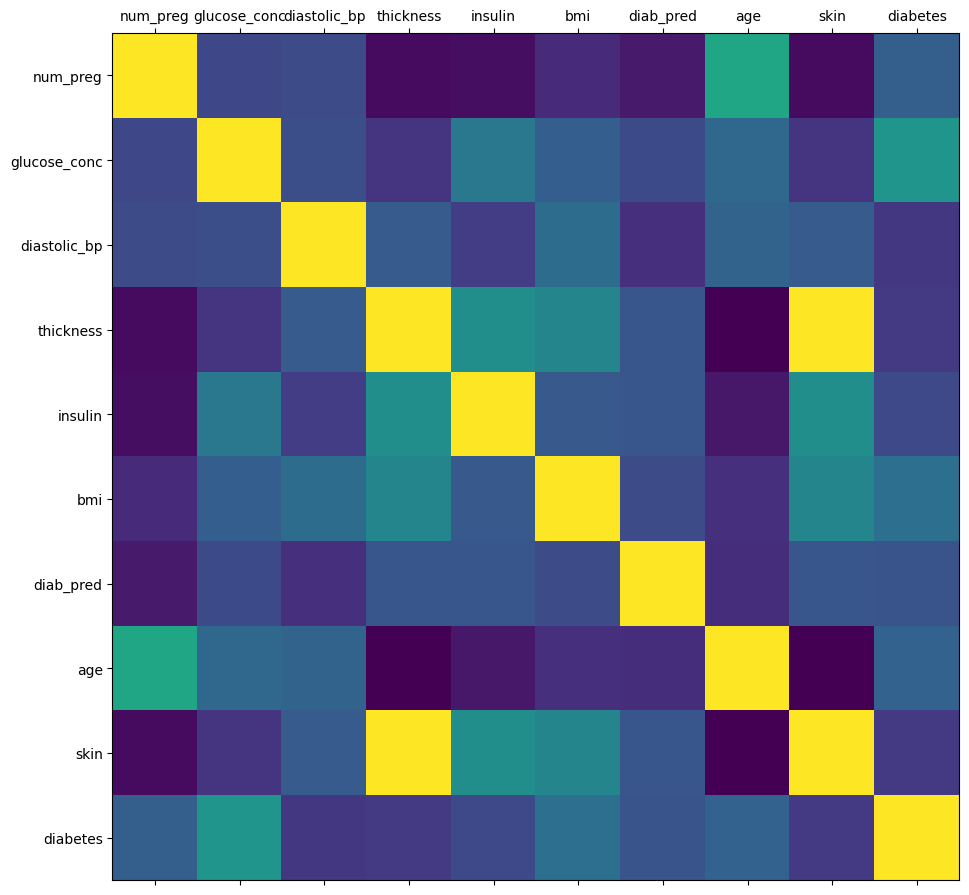

In [10]:
plot_corr(df)

This data has a strong correlation between skin and thickness. If we look at the actual numbers, we see it has a perfect correlation of exactly 1.

In [11]:
df.corr()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970,0.238356
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074752,1.000000


In [12]:
del df['skin'] #we are going to remove the skin column and just keep the thickness column

## Check data types

In [13]:
diabetes_map = {True: 1, False: 0}
df['diabetes'] = df['diabetes'].map(diabetes_map)

In [14]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Check true/false ratio
Predicting rare events is hard, so let's make sure we have enough "true" events in our data


In [15]:
num_true = len(df.loc[df['diabetes'] == True])
num_false = len(df.loc[df['diabetes'] == False])
total_num = num_true + num_false

print("Percentage of True cases: {0:2.2f}%".format((num_true/ total_num * 100)))

Percentage of True cases: 34.90%


## Track how you manipulate data
1. Csv => pandas data frame
2. identified correlated features
3. removed "skin"
4. Molded data (transformed true/false to 1/0)
5. checked true/false ratio

In [16]:
# split data, 70% for training, 30% for testing.
# selecting training features:
    #train with the minimum features
    #we will use all remaining fields because we already tidied up the data.

In [17]:
#scikit-learn library has training functions


## Splitting the data
70% for training, 30% fro testing

In [18]:
from sklearn.model_selection import train_test_split

feature_col_names = ['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin', 'bmi', 'diab_pred', 'age']
predicted_class_names = ['diabetes']

#split data into two data frames
X = df[feature_col_names].values # predictor feature columns (8 X m)
y = df[predicted_class_names].values #predicted class (1=true, 0=false) column (1 X m)
split_test_size = 0.30

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state = 42)
# this returns four data frames, it essentially splits our two data frames each into a test and train set.
# the random state ensures that if we run this function again, we'll get the same exact split.



## Verify data was split correctly

In [19]:
print("{0:0.2f}% in training set".format((len(X_train)/len(df.index))*100))
print("{0:0.2f}% in testing set".format((len(X_test)/len(df.index))*100))

69.92% in training set
30.08% in testing set


In [20]:
training_true = len(y_train[y_train[:] == 1])
training_false = len(y_train[y_train[:] == 0])
training_total = training_true + training_false

print("Percentage of True cases in training data: {0:2.2f}%".format((training_true/ training_total* 100)))
print("Percentage of False cases in training data: {0:2.2f}%".format((training_false/ training_total* 100)))

testing_true = len(y_test[y_test[:] == 1])
testing_false = len(y_test[y_test[:] == 0])
testing_total = testing_true + testing_false

print("Percentage of True cases in testing data: {0:2.2f}%".format((testing_true/ testing_total* 100)))
print("Percentage of False cases in testing data: {0:2.2f}%".format((testing_false/ testing_total* 100)))

Percentage of True cases in training data: 35.01%
Percentage of False cases in training data: 64.99%
Percentage of True cases in testing data: 34.63%
Percentage of False cases in testing data: 65.37%


## Post-split Data Prepartion

In [21]:
#### Hidden Missing Values
df.head()


,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [22]:
print ("# rows in dataframe: {0}".format(len(df)))
print("# rows missing glucose_conc: {0}".format(len(df.loc[df['glucose_conc'] == 0])))
print("# rows missing diastolic_bp: {0}".format(len(df.loc[df['diastolic_bp'] == 0])))
print("# rows missing thickness: {0}".format(len(df.loc[df['thickness'] == 0])))
print("# rows missing insulin: {0}".format(len(df.loc[df['insulin'] == 0])))
print("# rows missing bmi: {0}".format(len(df.loc[df['bmi'] == 0])))
print("# rows missing diab_pred: {0}".format(len(df.loc[df['diab_pred'] == 0])))
print("# rows missing age: {0}".format(len(df.loc[df['age'] == 0])))



# rows in dataframe: 768
# rows missing glucose_conc: 5
# rows missing diastolic_bp: 35
# rows missing thickness: 227
# rows missing insulin: 374
# rows missing bmi: 11
# rows missing diab_pred: 0
# rows missing age: 0


## What do we do about missing data?
a. ignore?
b. drop observations?
c. replace values (impute)


Imputing:
a. replace with mean or median.
b. replace with expert knowledge derived value.
c. using mean imputing

In [23]:
from sklearn.impute import SimpleImputer
#Impute with mean all 0 readings
fill_0 = SimpleImputer(missing_values=0, strategy="mean")
X_train = fill_0.fit_transform(X_train)
X_test = fill_0.fit_transform(X_test)

## Training Initial Algorithm - Naive Bayes

In [24]:
from sklearn.naive_bayes import GaussianNB

# create Gaussian Naive Bayes model object and train it with the data
# Gaussian = assumes data is in classic bell curve wit the median near the mean
nb_model = GaussianNB()
nb_model.fit(X_train, y_train.ravel())

GaussianNB()

## Evaluate Model

In [28]:
nb_predict_train = nb_model.predict(X_train)
nb_predict_test = nb_model.predict(X_test)

from sklearn import metrics

print("Accuracy for training data: {0:.4f}".format(metrics.accuracy_score(y_train, nb_predict_train)))
print("Accuracy for testing data: {0:.4f}".format(metrics.accuracy_score(y_test, nb_predict_test)))

Accuracy for training data: 0.7542
Accuracy for testing data: 0.7359


In [31]:
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, nb_predict_test)))
print("")

print("Classification Report")
print(metrics.classification_report(y_test, nb_predict_test))

Confusion Matrix
[[118  33]
 [ 28  52]]

Classification Report
              precision    recall  f1-score   support

           0       0.81      0.78      0.79       151
           1       0.61      0.65      0.63        80

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.71       231
weighted avg       0.74      0.74      0.74       231



## Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train.ravel())

RandomForestClassifier(random_state=42)

In [33]:
rf_predict_train = rf_model.predict(X_train)

print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, rf_predict_train)))

Accuracy: 1.0000


In [34]:
rf_predict_test = rf_model.predict(X_test)

print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, rf_predict_test)))

Accuracy: 0.7403


In [35]:
# This is an example of overfitting
# regularization hyperparameter (I need some more info on this)
# cross validation (multiple training data sets)
# bias - variance trade-off


## Logistic Regression


In [39]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(C=0.7, random_state=42, max_iter=500) #c is the regularization hyperparameter, and .7 is just a random guess to start with
lr_model.fit(X_train, y_train.ravel())  # I need to look into what this .ravel() function does.
lr_predict_test = lr_model.predict(X_test)

In [40]:
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_predict_test)))
print(metrics.confusion_matrix(y_test, lr_predict_test))
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_predict_test))


Accuracy: 0.7359
[[123  28]
 [ 33  47]]

Classification Report
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       151
           1       0.63      0.59      0.61        80

    accuracy                           0.74       231
   macro avg       0.71      0.70      0.70       231
weighted avg       0.73      0.74      0.73       231



1st max value of 0.588 occured at C=0.100


Text(0, 0.5, 'recall score')

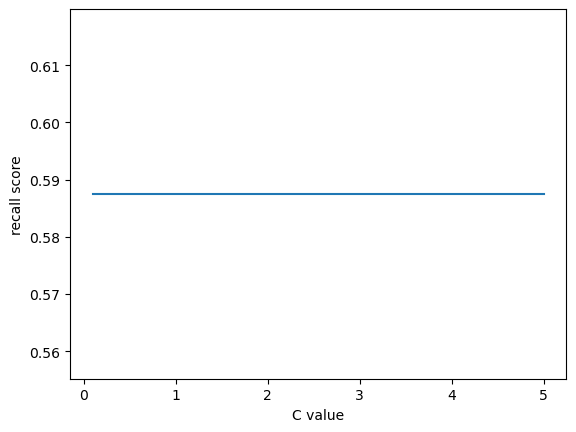

In [52]:
# A loop that selects the C value that returns the highest recall.

C_start = .1
C_end = 5
C_inc = 0.1

C_values, recall_scores = [], []

C_val = C_start
best_recall_score = 0
while (C_val < C_end):
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C=C_val, random_state=42, max_iter=300)
    lr_model_loop.fit(X_train, y_train.ravel())
    lr_predict_loop_test = lr_model_loop.predict(X_test)
    recall_score = metrics.recall_score(y_test, lr_predict_loop_test)
    recall_scores.append(recall_score)
    if (recall_score > best_recall_score) :
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test
    
    C_val = C_val + C_inc
    
best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print("1st max value of {0:.3f} occured at C={1:.3f}".format(best_recall_score, best_score_C_val))

%matplotlib inline
plt.plot(C_values, recall_scores, "-")
plt.xlabel("C value")
plt.ylabel("recall score")
## These results are obviously wrong. Not sure where it's going wrong though. It seems like the C value is not making a difference.


## Unbalanced Classes 
More of one class than the others 
Our data- 65% no diabetes, 25% diabetes

1st max value of 0.650 occured at C=0.100


Text(0, 0.5, 'recall score')

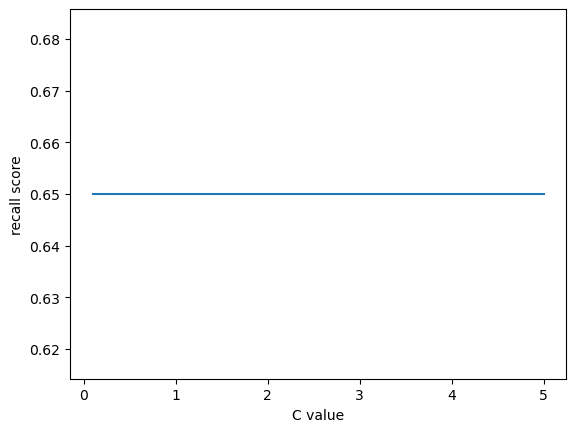

In [54]:
# let's do log regression again but this time with class_weight="balanced"

C_start = .1
C_end = 5
C_inc = 0.1

C_values, recall_scores = [], []

C_val = C_start
best_recall_score = 0
while (C_val < C_end):
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C=.3, class_weight="balanced", random_state=42, max_iter=300)
    lr_model_loop.fit(X_train, y_train.ravel())
    lr_predict_loop_test = lr_model_loop.predict(X_test)
    recall_score = metrics.recall_score(y_test, lr_predict_loop_test)
    recall_scores.append(recall_score)
    if (recall_score > best_recall_score) :
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test
    
    C_val = C_val + C_inc
    
best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print("1st max value of {0:.3f} occured at C={1:.3f}".format(best_recall_score, best_score_C_val))

%matplotlib inline
plt.plot(C_values, recall_scores, "-")
plt.xlabel("C value")
plt.ylabel("recall score")

In [55]:
## what is cross validation?
## we need a third data set: training, validation and testing
## how do we choose the validation data? what if we don't have enough data?

In [56]:
# K -fold cross validation

# keep two sets: training and testing data
# split the training dataset into "folds".
# one of these folds becomes the validation data, repeat with second fold as validation, then so on


## Logistic Regression CV

In [59]:
from sklearn.linear_model import LogisticRegressionCV
lr_cv_model = LogisticRegressionCV(n_jobs=-1, random_state=42, Cs=3, cv=10, refit=False, class_weight="balanced") #cv = number of folds
lr_cv_model.fit(X_train, y_train.ravel())

LogisticRegressionCV(Cs=3, class_weight='balanced', cv=10, n_jobs=-1,
                     random_state=42, refit=False)

In [60]:
lr_cv_predict_test = lr_cv_model.predict(X_test)

print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_cv_predict_test)))
print(metrics.confusion_matrix(y_test, lr_cv_predict_test))
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_cv_predict_test))

Accuracy: 0.7056
[[109  42]
 [ 26  54]]

Classification Report
              precision    recall  f1-score   support

           0       0.81      0.72      0.76       151
           1       0.56      0.68      0.61        80

    accuracy                           0.71       231
   macro avg       0.68      0.70      0.69       231
weighted avg       0.72      0.71      0.71       231



## To Do:
- Understand confusion matrix and classification report
- Understand regularization hyperparameters
- Figure out why my results with the log regression isn't matching the tutorial
- Understand how random forests and logistical regression work
- what does .ravel() do?

In [61]:
# machine learning workflow
# asking the right question
# preparing data
# selecting the algorithm
# training the model
# testing the model


#other courses
#python fundamentals
# understanding machine learning in R

#UCI Machine Learning Repository
#Jupyter Notebook site